In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore only the specific FutureWarning from pandas option
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning,
    message=r".*use_inf_as_na option is deprecated.*"
)

# Setting matplotlib defaults
plt.rc('figure', figsize=(8, 5), dpi=120)

plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-jack-smart-effect-of-removal-ml/sample_submission.csv
/kaggle/input/black-jack-smart-effect-of-removal-ml/train.csv
/kaggle/input/black-jack-smart-effect-of-removal-ml/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/test.csv', index_col='id')

# Data Understanding

In [3]:
train.head(10)

,1,2,3,4,5,6,7,8,9,10,ev
id,,,,,,,,,,,
0,12,6,16,11,14,14,15,20,11,61,-0.037038
1,7,6,7,6,10,10,9,10,5,30,-0.019283
2,9,9,5,8,9,8,7,7,7,31,-0.024862
3,13,16,12,10,12,14,12,12,11,48,-0.023246
4,7,8,8,9,11,10,5,12,8,42,-0.025703
5,7,7,5,8,6,8,9,9,9,32,-0.032025
6,2,2,2,1,4,2,4,6,2,15,-0.029387
7,2,2,0,0,4,1,1,2,2,6,-0.024910
8,18,13,16,15,14,17,17,14,16,60,-0.030389


In [4]:
train.shape

(20500, 11)

In [5]:
test.shape

(8655, 10)

In [6]:
train.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
ev    0
dtype: int64

In [7]:
test.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [8]:
train.describe()

,1,2,3,4,5,6,7,8,9,10,ev
count,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000,20500.000000
mean,7.591756,7.601073,7.597951,7.577659,7.598439,7.592683,7.552049,7.568878,7.602439,30.334634,-0.023383
std,4.809277,4.771329,4.799255,4.764657,4.790892,4.796563,4.754059,4.773905,4.766625,17.658349,0.010041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.071232
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000,-0.029104
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,28.000000,-0.024109
75%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000,-0.018508
max,22.000000,22.000000,22.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,74.000000,0.044198


In [9]:
test.describe()

,1,2,3,4,5,6,7,8,9,10
count,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000
mean,7.622415,7.614211,7.564298,7.553206,7.574466,7.541075,7.574003,7.549856,7.605893,30.395609
std,4.770199,4.773575,4.765060,4.773822,4.785457,4.737471,4.761329,4.762710,4.804795,17.683448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,28.000000
75%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,44.000000
max,22.000000,22.000000,22.000000,22.000000,23.000000,22.000000,21.000000,21.000000,23.000000,73.000000


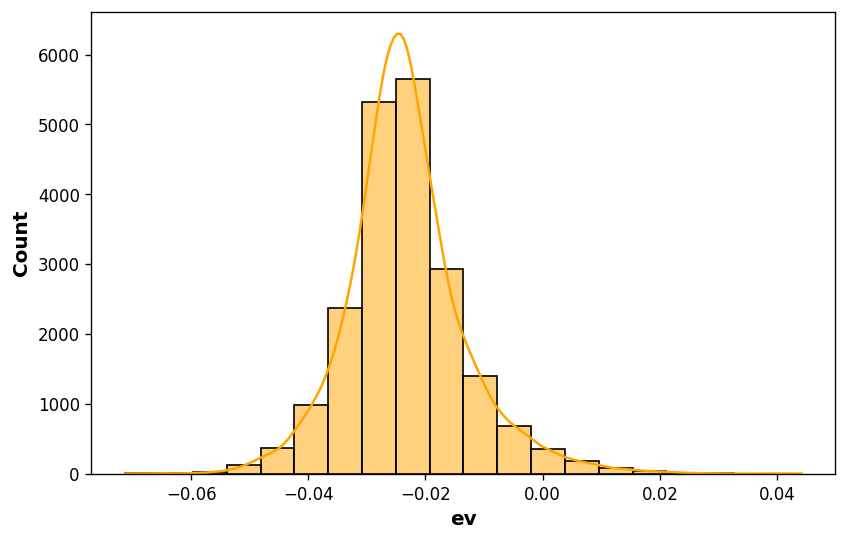

In [10]:
sns.histplot(x='ev', data=train, bins=20, kde=True, color='orange')
plt.show()

<Axes: >

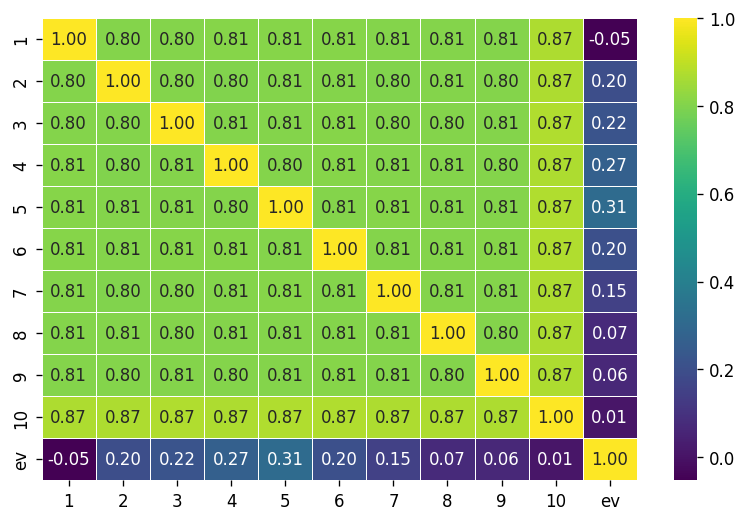

In [11]:
sns.heatmap(train.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [12]:
train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'ev'], dtype='object')

# Feature engineering

In [13]:
train['removed_low'] = train[[str(i) for i in range(2, 7)]].sum(axis=1)
test['removed_low'] = test[[str(i) for i in range(2, 7)]].sum(axis=1)

train['removed_mid'] = train[[str(i) for i in range(7, 10)]].sum(axis=1)
test['removed_mid'] = test[[str(i) for i in range(7, 10)]].sum(axis=1)

train['total_removed'] = train[[str(i) for i in range(1, 11)]].sum(axis=1)
test['total_removed'] = test[[str(i) for i in range(1, 11)]].sum(axis=1)

In [14]:
train['removed_aces'] = train['1']
train['removed_tens'] = train['10']

test['removed_aces'] = test['1']
test['removed_tens'] = test['10']

In [15]:
train['aces_tens_ratios'] = train['removed_aces'] / (train['removed_tens'] + 1e-6)
test['aces_tens_ratios'] = test['removed_aces'] / (test['removed_tens'] + 1e-6)

train['low_mid_ratios'] = train['removed_low'] / (train['removed_mid'] + 1e-6)
test['low_mid_ratios'] = test['removed_low'] / (test['removed_mid'] + 1e-6)

train['aces_tens_interact'] = train['removed_aces'] * train['removed_tens'] 
test['aces_tens_interact'] = test['removed_aces'] * test['removed_tens'] 



In [16]:
test.isnull().sum()

1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
removed_low           0
removed_mid           0
total_removed         0
removed_aces          0
removed_tens          0
aces_tens_ratios      0
low_mid_ratios        0
aces_tens_interact    0
dtype: int64

In [17]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

X = train.copy()
y = X.pop('ev')
X_test = test.copy()

oof_lgm = np.zeros(len(y))
oof_xgb = np.zeros(len(y))
oof_cat = np.zeros(len(y))
test_preds_lgm = np.zeros(len(X_test))
test_preds_xgb = np.zeros(len(X_test))
test_preds_cat = np.zeros(len(X_test))

## OOF Predictions

In [18]:
n_folds=10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=34)

for fold, (train_index, valid_index) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    lgm = LGBMRegressor(n_estimators=10000, learning_rate=0.065, max_depth=4, subsample=0.8, colsample_bynode=0.8, reg_lambda=5.514608, verbose=-1, 
    random_state=34, early_stopping_rounds=50, eval_metric='mse').fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

    lgm_pred = lgm.predict(X_valid)
    oof_lgm[valid_index] = lgm_pred

    fold_rmse = np.sqrt(mean_squared_error(y_valid, lgm_pred))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.9f}")
    
    test_preds_lgm += lgm.predict(X_test) / n_folds

Fold 1 RMSE: 0.000870240
Fold 2 RMSE: 0.000807698
Fold 3 RMSE: 0.000828345
Fold 4 RMSE: 0.000827182
Fold 5 RMSE: 0.000976903
Fold 6 RMSE: 0.000843531
Fold 7 RMSE: 0.000840266
Fold 8 RMSE: 0.000839445
Fold 9 RMSE: 0.000806517
Fold 10 RMSE: 0.000843658


In [19]:
from xgboost import XGBRegressor

for fold, (train_index, valid_index) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    xgb = XGBRegressor(n_estimators=10000, learning_rate=0.08149, max_depth=3, reg_lambda=0.62318, subsample=0.54478, colsample_bynode=0.9759,
    random_state=34, early_stopping_rounds=50).fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)

    xgb_pred = xgb.predict(X_valid)
    oof_xgb[valid_index] = xgb_pred

    fold_rmse = np.sqrt(mean_squared_error(y_valid, xgb_pred))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.9f}")
    
    test_preds_xgb += xgb.predict(X_test) / n_folds

Fold 1 RMSE: 0.000883976
Fold 2 RMSE: 0.000863408
Fold 3 RMSE: 0.000865021
Fold 4 RMSE: 0.000890105
Fold 5 RMSE: 0.000983093
Fold 6 RMSE: 0.000842546
Fold 7 RMSE: 0.000848094
Fold 8 RMSE: 0.000885164
Fold 9 RMSE: 0.000864436
Fold 10 RMSE: 0.000936210


In [20]:
from catboost import CatBoostRegressor

for fold, (train_index, valid_index) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    cat = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=8, l2_leaf_reg=2, subsample=0.85,
    random_state=34, early_stopping_rounds=50).fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)

    cat_pred = cat.predict(X_valid)
    oof_cat[valid_index] = cat_pred

    fold_rmse = np.sqrt(mean_squared_error(y_valid, cat_pred))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.9f}")
    
    test_preds_cat += cat.predict(X_test) / n_folds

Fold 1 RMSE: 0.000744293
Fold 2 RMSE: 0.000668747
Fold 3 RMSE: 0.000718327
Fold 4 RMSE: 0.000683181
Fold 5 RMSE: 0.000834213
Fold 6 RMSE: 0.000709104
Fold 7 RMSE: 0.000662768
Fold 8 RMSE: 0.000674970
Fold 9 RMSE: 0.000644319
Fold 10 RMSE: 0.000718094


# Meta Model using Bayesian Ridge

In [21]:
from sklearn.linear_model import BayesianRidge

meta_train = np.column_stack((oof_xgb, oof_lgm, oof_cat))
meta_test = np.column_stack((test_preds_xgb, test_preds_lgm, test_preds_cat))

meta_model = BayesianRidge().fit(meta_train, y)

final_preds = meta_model.predict(meta_test)


In [22]:
sub = pd.read_csv('/kaggle/input/black-jack-smart-effect-of-removal-ml/sample_submission.csv')
sub['ev'] = final_preds
sub.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
